In [ ]:
eleimport pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rc
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate
from sklearn.model_selection import KFold

# Helper Functions

In [ ]:
def crossval_on_models(x,y,title):
  clf1=dtc()
  print("5 fold cross validation on DTC:",cross_val_score(clf1,x,y,cv=5))
  clf2=SVC()
  print("5 fold cross validation on SVC:",cross_val_score(clf2,x,y,cv=5))
  cval_dtc=cross_val_score(clf1,x,y,cv=5)
  cval_svc=cross_val_score(clf2,x,y,cv=5)
  plt.plot(cval_dtc,marker='o')
  plt.plot(cval_svc,marker='o')
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Fold No.')
  plt.show()

In [ ]:
def fivefoldtest(X,Y):
  accs=[]
  kf=KFold(n_splits=5,shuffle=True)
  for train_index, test_index in kf.split(X):
    x1,x2=X[train_index] , X[test_index]
    y1,y2=Y[train_index] , Y[test_index]
    clf=LDA(x1,y1,0.95)
    _=clf.reduceddim()
    pred=[]
    for i in x2:
      pred.append(clf.predict(i))
    # print(pred,y2,'\n')
    accs.append(acc(y2,pred))
  return(accs)

In [ ]:
def evaluation_on_models(x,y):
  x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3)
  clf1=dtc()
  clf1.fit(x_train,y_train)
  print("for DTC \naccuracy:",acc(y_test,clf1.predict(x_test)),"\nf1 score:",f1(y_test,clf1.predict(x_test),average='weighted'),"\nprecision:",ps(y_test,clf1.predict(x_test),average='weighted'),"\nrecall:",rc(y_test,clf1.predict(x_test),average='weighted'))

  clf2=SVC()
  clf2.fit(x_train,y_train)
  print("for SVC \naccuracy:",acc(y_test,clf2.predict(x_test)),"\nf1 score:",f1(y_test,clf2.predict(x_test),average='weighted'),"\nprecision:",ps(y_test,clf2.predict(x_test),average='weighted'),"\nrecall:",rc(y_test,clf2.predict(x_test),average='weighted'))

  return(acc(y_test,clf1.predict(x_test)) , acc(y_test,clf2.predict(x_test)))

In [ ]:
def eigenvecs(red_df,a,b):
  PC3=red_df[:,a]
  PC2=red_df[:,b]
  u3=np.mean(PC3)
  u2=np.mean(PC2)

  cov=0
  for i in range(len(PC3)):
    cov+=(PC3[i]-u3)*(PC2[i]-u2)
  cov=cov/len(PC3)
  var3=0
  for i in range(len(PC3)):
    var3+=(PC3[i]-u3)**2
  var3=var3/len(PC3)
  var2=0
  for i in range(len(PC2)):
    var2+=(PC2[i]-u2)**2
  var2=var2/len(PC3)

  covmat=[[var3,cov],[cov,var2]]
  _,vec=np.linalg.eig(covmat)
  return(vec)

# Q1

In [ ]:
df1=pd.read_csv("/content/anneal.data")
df1=df1.to_numpy()
df2=pd.read_csv("/content/anneal.test")
df2=df2.to_numpy()

In [ ]:
def addcols(data):
  n=len(data[0])
  cols=[]
  for i in range(n):
    s="X"+str(i)
    cols.append(s)
  np.insert(data,0,cols)


In [ ]:
addcols(df1)
df1=pd.DataFrame(df1)
addcols(df2)
df2=pd.DataFrame(df2)

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.2,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.7,1300.0,762,?,0,?,3
2,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
4,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.6,610.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
793,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
794,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.4,609.9,0,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.2,610.0,4880,?,0,?,3


In [ ]:
def checknull(data,l):
  for i in data.columns:
     num=len(data[data[i] == '?'])
     print("Null value percentage in col. no.",i,":",(num/798)*100,'\n')
     l.append((num/798)*100)

In [ ]:
null1=[]
checknull(df1,null1)

Null value percentage in col. no. 0 : 85.96491228070175 

Null value percentage in col. no. 1 : 0.0 

Null value percentage in col. no. 2 : 8.771929824561402 

Null value percentage in col. no. 3 : 0.0 

Null value percentage in col. no. 4 : 0.0 

Null value percentage in col. no. 5 : 84.46115288220551 

Null value percentage in col. no. 6 : 33.959899749373434 

Null value percentage in col. no. 7 : 35.338345864661655 

Null value percentage in col. no. 8 : 0.0 

Null value percentage in col. no. 9 : 87.96992481203007 

Null value percentage in col. no. 10 : 98.87218045112782 

Null value percentage in col. no. 11 : 27.192982456140353 

Null value percentage in col. no. 12 : 98.24561403508771 

Null value percentage in col. no. 13 : 99.74937343358395 

Null value percentage in col. no. 14 : 85.08771929824562 

Null value percentage in col. no. 15 : 92.10526315789474 

Null value percentage in col. no. 16 : 76.19047619047619 

Null value percentage in col. no. 17 : 82.83208020050125 

N

In [ ]:
  for i in range(len(null1)):
    if(null1[i]>=25):
      df1=df1.drop([(i)],axis=1)

In [ ]:
df1

,1,2,3,4,8,31,32,33,34,36,38
0,C,R,0,0,0,COIL,3.2,610.0,0,0,3
1,C,R,0,0,0,SHEET,0.7,1300.0,762,0,3
2,C,A,0,60,0,COIL,2.801,385.1,0,0,3
3,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,C,A,0,45,0,COIL,1.6,610.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,C,A,0,50,0,COIL,1.001,50.0,0,0,3
793,C,?,0,0,0,SHEET,0.699,1300.0,4880,0,3
794,C,A,0,0,0,COIL,0.4,609.9,0,0,3
795,C,A,0,0,0,SHEET,3.2,610.0,4880,0,3


In [ ]:
for i in df1.columns:
  df1[i]=df1[i].replace('?',np.nan)

In [ ]:
df1

,1,2,3,4,8,31,32,33,34,36,38
0,C,R,0,0,0,COIL,3.2,610.0,0,0,3
1,C,R,0,0,0,SHEET,0.7,1300.0,762,0,3
2,C,A,0,60,0,COIL,2.801,385.1,0,0,3
3,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,C,A,0,45,0,COIL,1.6,610.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,C,A,0,50,0,COIL,1.001,50.0,0,0,3
793,C,NaN,0,0,0,SHEET,0.699,1300.0,4880,0,3
794,C,A,0,0,0,COIL,0.4,609.9,0,0,3
795,C,A,0,0,0,SHEET,3.2,610.0,4880,0,3


In [ ]:
df1=df1.dropna()

In [ ]:
dfy=df1[38]
df1=df1.drop([38,1],axis=1)

In [ ]:
dfy=dfy.to_numpy()

In [ ]:
le = preprocessing.OrdinalEncoder()
le.fit(df1)
df=le.transform(df1)

In [ ]:
le1 = preprocessing.LabelEncoder()
le1.fit(dfy)
dfy=le1.transform(dfy)

In [ ]:
scaler = StandardScaler()
dfs=scaler.fit(df).transform(df)

5 fold cross validation on DTC: [0.90410959 0.90410959 0.91724138 0.88965517 0.90344828]
5 fold cross validation on SVC: [0.76712329 0.76712329 0.77241379 0.77241379 0.76551724]


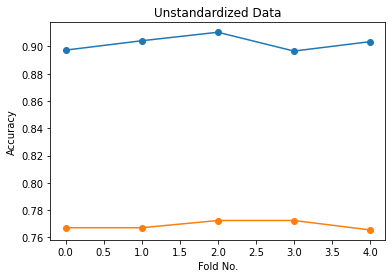

In [ ]:
crossval_on_models(df,dfy,"Unstandardized Data")

5 fold cross validation on DTC: [0.90410959 0.91780822 0.92413793 0.89655172 0.90344828]
5 fold cross validation on SVC: [0.79452055 0.83561644 0.82758621 0.82068966 0.82758621]


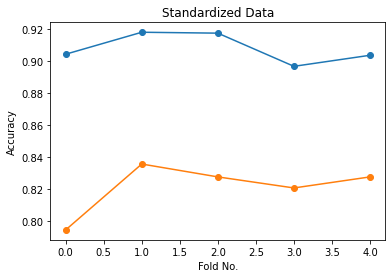

In [ ]:
crossval_on_models(dfs,dfy,'Standardized Data')

In [ ]:
class PCA:
  def __init__(self,data,nPC):
    self.data=data
    self.n=len(data[0])
    self.eigenvec=[]
    self.mat=[]
    self.eigvals=[]
    self.nPC=nPC
    self.pair=[]
  def centralize(self):
    c_data=[]
    for i in range(self.n):
      x=self.data[:,i]
      u=np.mean(x)
      s=np.std(x)
      l=[]
      for j in x:
        l.append((j-u))
      c_data.append(l)
    self.data=np.array(c_data).T
    # print("centralized dataset:",self.data)

  def covmat(self):
    covmat_=[]
    for i in range(self.n):
      l=[]
      s=0
      for j in range(self.n):
        x=self.data[:,i]
        y=self.data[:,j]
        xm=np.mean(x)
        ym=np.mean(y)

        for k in range(len(x)):
          s+=(x[k]-xm)*(y[k]-ym)
        s=s/len(x)
        l.append(s)
      covmat_.append(l)
    self.mat=(np.array(covmat_))
    # print("covariance matrix:",self.mat)

  def eigenvals(self):
    for i in range(self.n):
      v=self.eigenvec[:,i]
      v=v.reshape(self.n,1)
      x=self.mat@v

      # print(x)
      self.eigvals.append(np.mean(x/v))
    # print("eigen values:",self.eigvals)

  def eigenvecs(self):
    u,v=np.linalg.eig(self.mat)
    self.eigenvec=v
    # print("eigen vectors:",v)


  def reduceddim(self):
    self.centralize()
    self.covmat()
    self.eigenvecs()
    self.eigenvals()

    for i in range(self.n):
      if(self.eigvals[i]<0):
        self.eigvals[i]=-self.eigvals[i]
        self.eigenvec[:,i]=-self.eigenvec[:,i]

    var_till_ind=0
    totvar=sum(self.eigvals)
    vals=np.sort(self.eigvals)
    pair_=[]

    for i in reversed(vals):
      pair_.append([i,self.eigenvec[:,np.where(self.eigvals==i)[0]]])

    w=[]
    pair_=np.array(pair_)
    self.pair=pair_

    for count,i in enumerate(pair_[:,0]):
      if(count == self.nPC):
        break
      var_till_ind+=i
      w.append(pair_[count][1])

    w=np.array(w)
    w=w.reshape(self.n,self.nPC)
    return(self.data@w,var_till_ind)

  def eigens(self):
    return(np.sort(self.eigvals))

Text(0.5, 1.0, 'Unstandardized Data')

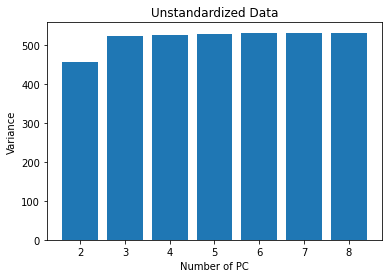

In [ ]:
vars=[]
for i in range(2,9):
  pca=PCA(df,i)
  red_df,var1=pca.reduceddim()
  vars.append(var1)
plt.bar(height=vars,x=[i for i in range(2,9)])
plt.ylabel("Variance")
plt.xlabel("Number of PC")
plt.title("Unstandardized Data")

In [ ]:
pca1=PCA(df,4)
red_df,var1=pca1.reduceddim()
print(red_df)
print(var1)

[[  6.73204857  -0.04193577  -1.42104297  -1.84987902]
 [ -2.06359966 -16.44475245   0.2070178   -6.16662471]
 [  4.81094746  12.59600247  -1.50502123   3.17543679]
 ...
 [  5.48563971   0.6417996    0.66233669   3.65880013]
 [ -9.3789179    9.02528683  -1.65556183  -1.6268081 ]
 [ -5.04562457 -17.94788521  -0.79987234 -10.04285907]]
526.5177235246878


Text(0.5, 1.0, 'Unstandardized')

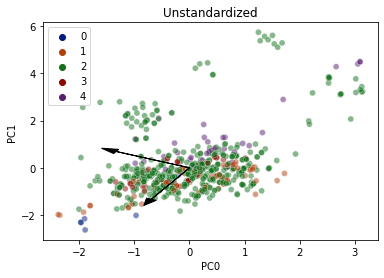

In [ ]:
vec=eigenvecs(red_df,0,1)
sns.scatterplot(x=red_df[:,0],y=red_df[:,1],hue=dfy,palette='dark',alpha=0.5)
plt.arrow(0,0,vec[0][0]*1.5,vec[1][0]*1.5,head_width=0.2,color='black')
plt.arrow(0,0,vec[0][1]*1.5,vec[1][1]*1.5,head_width=0.2,color='black')
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("Unstandardized")

5 fold cross validation on DTC: [0.76027397 0.83561644 0.80689655 0.77931034 0.82068966]
5 fold cross validation on SVC: [0.76712329 0.76712329 0.77241379 0.77241379 0.76551724]


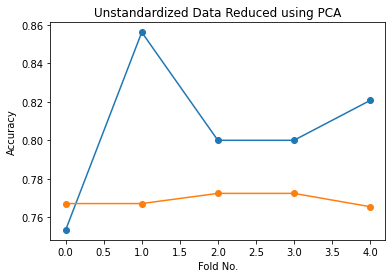

In [ ]:
crossval_on_models(red_df,dfy,"Unstandardized Data Reduced using PCA")

In [ ]:
print("Before PCA")
_=evaluation_on_models(df,dfy)

Before PCA
for DTC 
accuracy: 0.863013698630137 
f1 score: 0.8540047110195437 
precision: 0.8565616413614845 
recall: 0.863013698630137
for SVC 
accuracy: 0.7214611872146118 
f1 score: 0.6047260879570752 
precision: 0.5205062446571171 
recall: 0.7214611872146118


In [ ]:
print("After PCA")
_=evaluation_on_models(red_df,dfy)

After PCA
for DTC 
accuracy: 0.8310502283105022 
f1 score: 0.828866439478635 
precision: 0.8382054194310936 
recall: 0.8310502283105022
for SVC 
accuracy: 0.7853881278538812 
f1 score: 0.7055702917771883 
precision: 0.7420091324200914 
recall: 0.7853881278538812


In [ ]:
df_eig=np.flip(pca1.eigens())

Text(0, 0.5, 'Eigen Values')

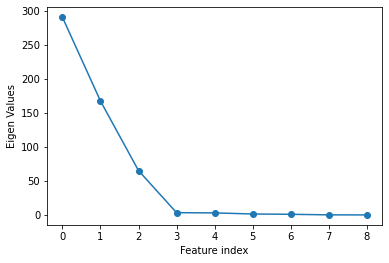

In [ ]:
plt.plot(df_eig,marker='o')
plt.xlabel("Feature index")
plt.ylabel("Eigen Values")

Text(0.5, 1.0, 'Standardized Data')

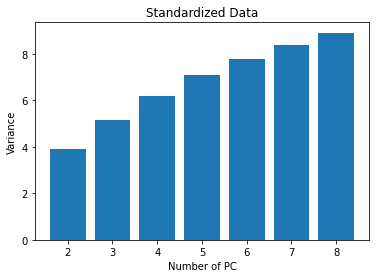

In [ ]:
vars_s=[]
for i in range(2,9):
  pca=PCA(dfs,i)
  red_df,var1=pca.reduceddim()
  vars_s.append(var1)
plt.bar(height=vars_s,x=[i for i in range(2,9)])
plt.ylabel("Variance")
plt.xlabel("Number of PC")
plt.title("Standardized Data")

In [ ]:
pca2=PCA(dfs,8)
red_dfs,vars=pca2.reduceddim()
print(red_dfs)

[[ 0.69065997  0.04177278 -1.89243657 ... -0.98395083  0.37491398
   0.34843316]
 [ 0.54629214 -0.61253807  0.50137608 ... -0.14357024  0.58849715
   0.83238958]
 [ 0.07146306  0.71472141 -1.0988024  ...  0.17135268 -0.59030406
  -1.43827818]
 ...
 [-0.08898896 -0.70355668  1.02948269 ...  0.96501755 -1.48706328
  -0.9166821 ]
 [-0.25666966  0.7258087  -1.20354284 ... -0.7707367   1.94012548
   0.42360648]
 [ 0.78892982  0.12642624 -0.65434087 ... -0.85697047  1.75119611
   1.2428637 ]]


Text(0.5, 1.0, 'Standardized')

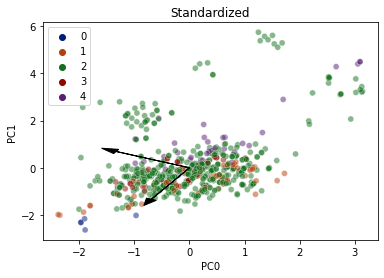

In [ ]:
vec_s=eigenvecs(red_dfs,0,1)
sns.scatterplot(x=red_dfs[:,0],y=red_dfs[:,1],hue=dfy,palette='dark',alpha=0.5)
plt.arrow(0,0,vec_s[0][0]*1.5,vec_s[1][0]*1.5,head_width=0.2,color='black')
plt.arrow(0,0,vec_s[0][1]*1.5,vec_s[1][1]*1.5,head_width=0.2,color='black')
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.title("Standardized")

5 fold cross validation on DTC: [0.84931507 0.85616438 0.87586207 0.82068966 0.85517241]
5 fold cross validation on SVC: [0.79452055 0.81506849 0.82758621 0.80689655 0.8       ]


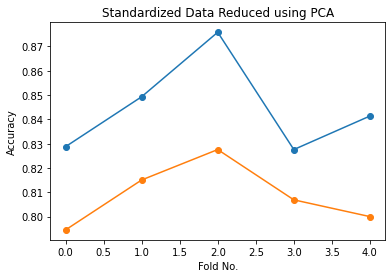

In [ ]:
crossval_on_models(red_dfs,dfy,'Standardized Data Reduced using PCA')

In [ ]:
print("Befotre PCA")
_=evaluation_on_models(dfs,dfy)

Befotre PCA
for DTC 
accuracy: 0.867579908675799 
f1 score: 0.8630786306312783 
precision: 0.8608930279567563 
recall: 0.867579908675799
for SVC 
accuracy: 0.817351598173516 
f1 score: 0.744309484333308 
precision: 0.7753647399487694 
recall: 0.817351598173516


In [ ]:
print("After PCA")
_=evaluation_on_models(red_dfs,dfy)

After PCA
for DTC 
accuracy: 0.867579908675799 
f1 score: 0.8552863347143568 
precision: 0.8691318030359126 
recall: 0.867579908675799
for SVC 
accuracy: 0.7899543378995434 
f1 score: 0.7206232390945302 
precision: 0.7416829745596868 
recall: 0.7899543378995434


Text(0, 0.5, 'Eigen Values')

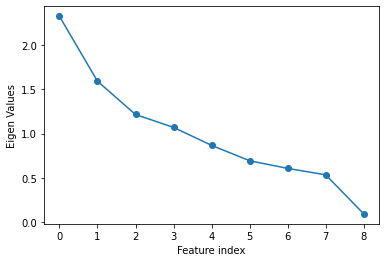

In [ ]:
dfs_eig=np.flip(pca2.eigens())
plt.plot(dfs_eig,marker='o')
plt.xlabel("Feature index")
plt.ylabel("Eigen Values")

# Q2

In [ ]:
def plot_decision_boundary(clf, X, Y, cmap='tab20b'):
    h =0.05
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z=[]
    for i in np.c_[xx.ravel(), yy.ravel()]:
      Z.append(clf.predict(i))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=cmap)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

In [ ]:
wine_data=pd.read_csv("/content/wine.data")
wine_y=wine_data['1']
wine_data=wine_data.drop(['1'],axis=1)
wine_x=wine_data.to_numpy()

In [ ]:
class LDA:
  def __init__(self,x,y,thresh):
    self.x=x
    self.y=y
    self.n=len(x[0])
    self.eigvals=[]
    self.eigvecs=[]
    self.sw=np.zeros((self.n,self.n))
    self.sb=np.zeros((self.n,self.n))
    self.classes=np.unique(self.y)
    self.means=[]
    self.mat=[]
    self.thresh=thresh
    self.w=[]
    self.red_data=[]

  def makeSW(self):
    for i in self.classes:
      x=self.x[self.y==i]
      u=np.mean(x,axis=0)
      self.means.append(u)
      self.sw+=np.cov(x.T)
    # print("sw",self.sw)

  def makeSB(self):
    u=np.mean(self.x,axis=0)
    count=[]
    for i in self.classes:
      count.append(np.count_nonzero(self.y==i))
    # print(count)
    for ind,i in enumerate(self.means):
      # print(i-u)
      self.sb+=count[ind]*((i-u).reshape(self.n,1))@(i-u).reshape(1,self.n)
    # print("sb",self.sb)

  def eigen(self):
    u,vec=np.linalg.eig(self.mat)
    self.eigvecs=vec
    # print("eigen vectors:",vec)
    # print(u)
    for i in range(self.n):
      v=self.eigvecs[:,i]
      v=v.reshape(self.n,1)
      x=self.mat@v
      self.eigvals.append(np.mean(x/v))

  def makeMat(self):
    self.mat=(np.linalg.inv(self.sw))@(self.sb)

  def reduceddim(self):

    self.makeSW()
    self.makeSB()
    self.makeMat()
    self.eigen()

    for i in range(self.n):
      if(self.eigvals[i]<0):
        self.eigvals[i]=-self.eigvals[i]
        self.eigvecs[:,i]=-self.eigvecs[:,i]

    pair_=[]

    var_till_ind=0
    totvar=sum(self.eigvals)
    vals=np.sort(self.eigvals)
    w=[]
    for i in reversed(vals):
      var_till_ind+=i
      w.append(self.eigvecs[:,self.eigvals==i].ravel())
      if(var_till_ind/totvar>=self.thresh):
        break
    w=np.array(w)
    self.w=w.T

    self.red_data=self.x@self.w
    return(self.red_data)

  def g(self,sig,u,x,p):
    return(1/2*(np.transpose(x)@sig@u + np.transpose(u)@sig@x - np.transpose(u)@sig@u) + np.log(p))

  def predict(self,x_test):
    test=x_test@self.w
    sig=np.cov(self.red_data.T)
    us=[]
    prir=[]

    for i in self.classes:
      x=self.red_data[self.y==i]
      us.append(np.mean(x,axis=0))
      prir.append((np.count_nonzero(self.y==i))/(len(self.y)))

    pred=-1
    max_g=-1
    for i in range(len(self.classes)):
      gs=self.g(sig,us[i],test,prir[i])
      if(gs>max_g):
        max_g=gs
        pred=self.classes[i]
    return(pred)

In [ ]:
lda1=LDA(wine_x,wine_y,0.95)
wine_red_lda=lda1.reduceddim().real

In [ ]:
wine_x_train,wine_x_test,wine_y_train,wine_y_test=tts(wine_x,wine_y,test_size=0.35)

<Axes: >

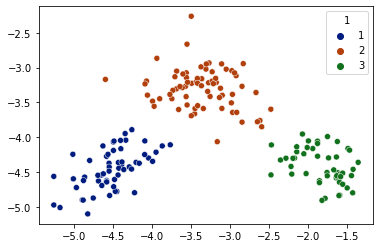

In [ ]:
sns.scatterplot(x=wine_red_lda[:,0],y=wine_red_lda[:,1],hue=wine_y,palette='dark')

In [ ]:
pca3=PCA(wine_x,2)
wine_red_pca,var_wine=pca3.reduceddim()
wine_red_pca=wine_red_pca.real

In [ ]:
acc_lda=evaluation_on_models(wine_red_lda,wine_y)

for DTC 
accuracy: 1.0 
f1 score: 1.0 
precision: 1.0 
recall: 1.0
for SVC 
accuracy: 1.0 
f1 score: 1.0 
precision: 1.0 
recall: 1.0


In [ ]:
acc_pca=evaluation_on_models(wine_red_pca,wine_y)

for DTC 
accuracy: 0.9074074074074074 
f1 score: 0.9090848806366049 
precision: 0.9166666666666666 
recall: 0.9074074074074074
for SVC 
accuracy: 0.8888888888888888 
f1 score: 0.8913498379015621 
precision: 0.9044011544011544 
recall: 0.8888888888888888


In [ ]:
table=[['DTC',acc_lda[0],acc_pca[0]],['SVC',acc_lda[1],acc_pca[1]]]
head=['models \ reduction technique','LDA','PCA']
print(tabulate(table, headers=head, tablefmt="grid"))

+--------------------------------+-------+----------+
| models \ reduction technique   |   LDA |      PCA |
+================================+=======+==========+
| DTC                            |     1 | 0.907407 |
+--------------------------------+-------+----------+
| SVC                            |     1 | 0.888889 |
+--------------------------------+-------+----------+


In [ ]:
fivefoldtest(wine_x,wine_y)

[0.8611111111111112,
 1.0,
 0.9714285714285714,
 0.9142857142857143,
 0.9714285714285714]